In [79]:
#########################
# CODE WITH MANUAL IMPLEMENTATION OF FLD(Code From Scratch)
# Classification Type : Fischer Linear Discriminant Analysis (FLD)
# DATASET :"Covid-19 Symptom Tracker(Raw-Data.csv/Cleaned-Data.csv)"
#########################

In [80]:
#########################
# Importing Basic Libraries
#########################
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import math

In [81]:
#########################
# Loading dataset
#########################
df = pd.read_excel ("E:/Codes/Jupyter/Datasets/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df = df.drop(['AGE_PERCENTIL'],axis = 1)
df = df.dropna()
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
6,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,1
8,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,6-12,1
9,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,ABOVE_12,1
14,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,380,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.523810,-0.717172,-0.505721,-0.119847,-0.553531,-0.245968,-0.535361,-0.717417,ABOVE_12,1
1914,382,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,ABOVE_12,1
1919,383,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,ABOVE_12,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0


In [82]:
#########################
# Assigning String Data with Numerical Values
#########################
duration_window = {'0-2': 1,'2-4': 2,'4-6': 3,'6-12': 4,'ABOVE_12': 5}
df.WINDOW = [duration_window[item] for item in df.WINDOW]
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,5,1
6,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,1
8,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.880952,-1.000000,-0.906832,-0.831132,-0.940967,-0.817204,-0.882574,-1.000000,4,1
9,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.142857,-0.797980,0.315690,0.200359,-0.239515,0.645161,0.139709,-0.802317,5,1
14,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.898990,-0.612422,-0.343258,-0.576744,-0.695341,-0.505464,-0.900129,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,380,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.523810,-0.717172,-0.505721,-0.119847,-0.553531,-0.245968,-0.535361,-0.717417,5,1
1914,382,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.500000,-0.838384,-0.513996,-0.236377,-0.617378,-0.191851,-0.498615,-0.835052,5,1
1919,383,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.571429,-0.838384,-0.552795,-0.585967,-0.557252,-0.573477,-0.572609,-0.838524,5,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2,0


In [83]:
#########################
# Allocating data Columns to variables
#########################
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, :-1]
y = df['ICU']

#########################
# finding unique values in the Dataset
#########################
total_classes = y.nunique()
print("Number of unique values in dataset: ",total_classes)

Number of unique values in dataset:  2


In [84]:
#########################
# Using the Inbuild SkLearn Preprocessing Directory
# for performing Linear Discriminant Analysis
#########################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [85]:
#########################
# Splitting dataset for training/validation purposes. 
# Taking 20% as validation set of the total dataset
# for performing Linear Discriminant Analysis
#########################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
#########################
# Using inbuilt preprocessing directories to form vector matrices
#########################
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [87]:
#########################
# Using LDA Libraries to transform the test data
#########################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [88]:
#########################
# Using Random Forest Classifier to perform prediction on the data
#########################
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [89]:
#########################
# Confusion Matrix & Accuracy of the model
#########################
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[52 12]
 [11 34]]
Accuracy0.7889908256880734


In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [91]:
lda.explained_variance_ratio_

array([1.])

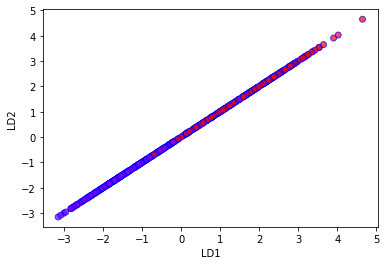

In [78]:
from matplotlib import pyplot as plt
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)